#  Analysis of one participant, pupil size in the local global task
__Content creator:__ Florent Meyniel, NeuroSpin, CEA Paris-Saclay & Institut de Neuromodulation, GHU Paris

The participant analyzed in this notebook has been collected for the study [Mazancieux et al (2023)](https://www.sciencedirect.com/science/article/pii/S2211124723014171)
The original paper introducing the local-global paradigm is [Bekinschtein et at 2009](https://www.sciencedirect.com/science/article/pii/S2211124723014171)


In [15]:
%matplotlib inline

## How to use a Python notebook?
You can skip the remainder of this section if you already know about Python notebooks.

The goal of today's session is *not* to learn how to program with Python. However, we will use Python to run some examples and do computations, so here is a quick introduction to Python notebook.

A notebook mixes text, lines of code that can be executed, and results that are displayed.

There are different ways to execute the code in a cell:
- put the cursor in the cell of code and press "SHIFT"+"ENTER".
- click on the "run" button (the triangle) in the menu bar at the top of this page.

For example, the next line asks Python to compute "1+1". Execute the line of code to display the (expected) result.

In [16]:
1+1

2

## Set-up the environment

In [ ]:
! git clone https://github.com/TheComputationalBrain/cogsup_localglobal_pupil.git

In [17]:
import glob
import os
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_analysis import process_eyelink_data

# Analyse
Get the files containing the pupil recording

In [18]:
data_files = sorted(glob.glob(os.path.join('example_data_set', '*.asc')))

Preprocess the data from each session

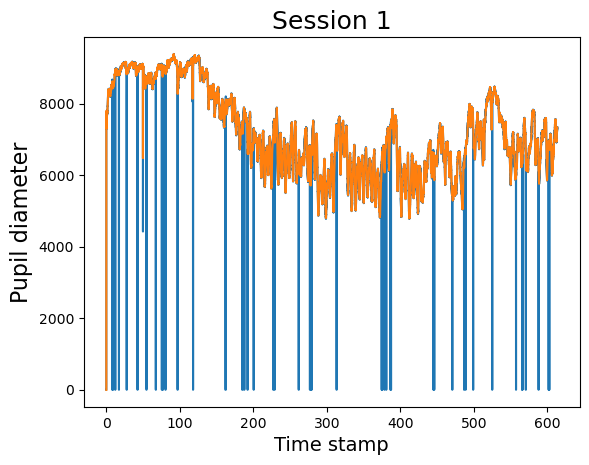

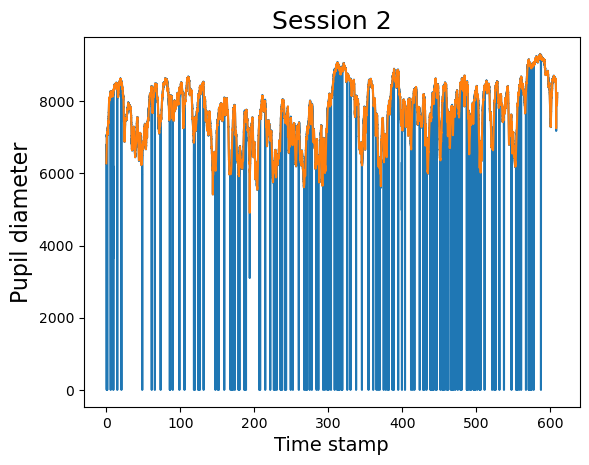

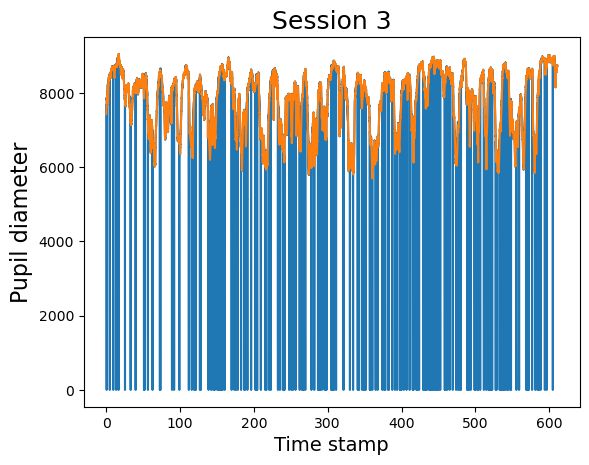

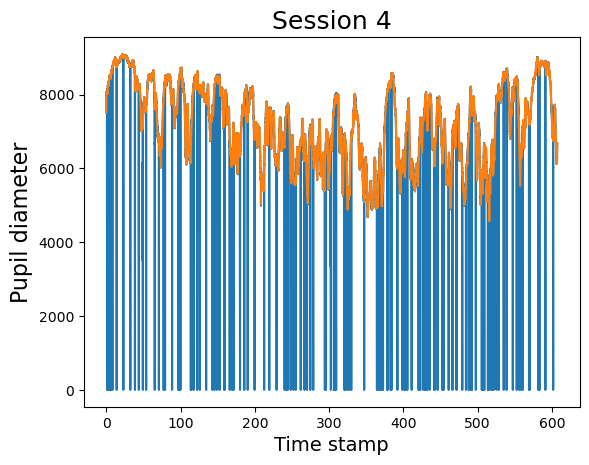

In [19]:
data = process_eyelink_data(data_files, baseline=[-0.2, 0], window=[-0.25, 3], reject_epoch=True, plot=True)

Let's have a look at how the trials are coded

In [20]:
print(data['info'])

     epoch_number  blink_ratio  baseline  session  block   stim  stim_num
0               0     0.000000  1.402023        1      1  AAAAA         1
1               1     0.000000  1.552547        1      1  AAAAA         2
2               2     0.000000  1.626902        1      1  AAAAA         3
3               3     0.100923  1.640764        1      1  AAAAA         4
4               4     0.100861  1.440709        1      1  AAAAA         5
..            ...          ...       ...      ...    ...    ...       ...
239           265     0.000000  1.546667        4      2  BBBBB       131
240           266     0.000000  1.054395        4      2  BBBBB       132
241           267     0.101538  0.227639        4      2  BBBBB       133
242           268     0.012308 -0.429094        4      2  BBBBB       134
243           269     0.000000  0.452042        4      2  BBBBB       135

[975 rows x 7 columns]


Let's recode the stimuli as local standard global standard (LSGS), local standard global deviant (LSGD), local deviant global standard (LDGS), local deviant global deviant (LDGD)

In [21]:
data['info']['stim_type'] = None
for sess_num in data['info']['session'].unique():
    for block_num in data['info']['block'].unique():

        stim_selection = (data['info']['session'] == sess_num) & (data['info']['block'] == block_num)
        event = data['info'][stim_selection]
        event = event.reset_index()
        
        if event['stim'].to_list()[0] == 'AAAAA': # define the frequent stimulus
            data['info'].loc[stim_selection, 'stim_type'] = np.where(event['stim']== 'AAAAA', 'LSGS', 'LDGD')

        elif event['stim'].to_list()[0] == 'BBBBB': # define the frequent stimulus
            data['info'].loc[stim_selection, 'stim_type'] = np.where(event['stim']== 'BBBBB', 'LSGS', 'LDGD')

        elif event['stim'].to_list()[0] == 'AAAAB': # define the frequent stimulus
            data['info'].loc[stim_selection, 'stim_type'] = np.where(event['stim']== 'AAAAB', 'LDGS', 'LSGD')

        elif event['stim'].to_list()[0] == 'BBBBA': # define the frequent stimulus
            data['info'].loc[stim_selection, 'stim_type'] = np.where(event['stim']== 'BBBBA', 'LDGS', 'LSGD')

In [22]:
print(data['info'])

     epoch_number  blink_ratio  baseline  session  block   stim  stim_num  \
0               0     0.000000  1.402023        1      1  AAAAA         1   
1               1     0.000000  1.552547        1      1  AAAAA         2   
2               2     0.000000  1.626902        1      1  AAAAA         3   
3               3     0.100923  1.640764        1      1  AAAAA         4   
4               4     0.100861  1.440709        1      1  AAAAA         5   
..            ...          ...       ...      ...    ...    ...       ...   
239           265     0.000000  1.546667        4      2  BBBBB       131   
240           266     0.000000  1.054395        4      2  BBBBB       132   
241           267     0.101538  0.227639        4      2  BBBBB       133   
242           268     0.012308 -0.429094        4      2  BBBBB       134   
243           269     0.000000  0.452042        4      2  BBBBB       135   

    stim_type  
0        LSGS  
1        LSGS  
2        LSGS  
3        LS

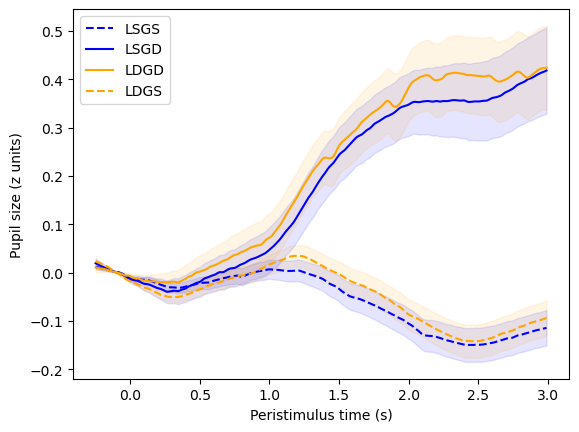

In [23]:
line_style = {'LSGS': '--',
            'LDGS': '--',
            'LSGD': '-',
            'LDGD': '-',}
line_color = {'LSGS': 'blue',
            'LDGS': 'orange',
            'LSGD': 'blue',
            'LDGD': 'orange',}

plt.figure()
for condition in ['LSGS', 'LSGD', 'LDGD', 'LDGS']:
        erp_mean = np.mean(data['data'][data['info']['stim_type'] == condition, :], axis=0)
        erp_sem = scipy.stats.sem(data['data'][data['info']['stim_type'] == condition, :], axis=0)
        plt.plot(data['times'],
                erp_mean,
                label=condition, color=line_color[condition], linestyle=line_style[condition])
        plt.fill_between(data['times'],
                        (erp_mean-erp_sem), (erp_mean+erp_sem),
                        color=line_color[condition], alpha=.1)
plt.xlabel('Peristimulus time (s)')
plt.ylabel('Pupil size (z units)')
plt.legend()